In [1]:
import matplotlib.pyplot as plt 
from wordcloud import WordCloud 
import pandas as pd
import numpy as np

In [2]:
from PIL import Image

In [3]:
from sklearn.datasets import load_wine
wine = load_wine()

In [4]:
wine

{'data': array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
         1.065e+03],
        [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
         1.050e+03],
        [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
         1.185e+03],
        ...,
        [1.327e+01, 4.280e+00, 2.260e+00, ..., 5.900e-01, 1.560e+00,
         8.350e+02],
        [1.317e+01, 2.590e+00, 2.370e+00, ..., 6.000e-01, 1.620e+00,
         8.400e+02],
        [1.413e+01, 4.100e+00, 2.740e+00, ..., 6.100e-01, 1.600e+00,
         5.600e+02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1

In [5]:
df = pd.DataFrame(data = wine.data, columns = wine.feature_names)
df

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [15]:
from scipy import ndimage

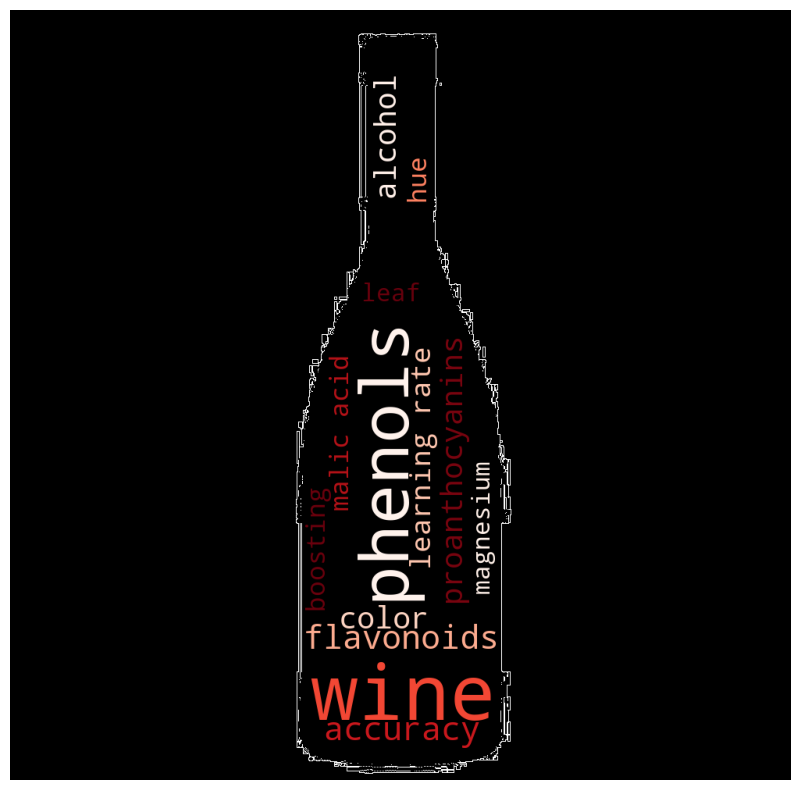

In [26]:
wine_mask = np.array(Image.open('./wine.jpg.jpg'))
text = {'wine':20, 'alcohol':12, 'color':13, 'phenols':15, 'flavonoids':15, 'proanthocyanins':12, 'magnesium': 8, 'malic acid': 9, 'accuracy':15, 'learning rate': 11, 'leaf':8, 'boosting':9, 'hue':9 }

binary_mask = np.array(wine_mask.mean(axis=2) < 200, dtype=int)
smoothed_mask = ndimage.binary_erosion(binary_mask, structure=np.ones((5, 5)))
smoothed_mask = ndimage.binary_dilation(smoothed_mask, structure=np.ones((5, 5)))
wc = WordCloud(width=400, height=800, mask = wine_mask ,contour_color = 'white', background_color='black', colormap='Reds_r',contour_width=0.001 )
wc.generate_from_frequencies(frequencies=text)
plt.figure( figsize=(20,10) )
plt.axis('off')
plt.imshow(wc)

In [57]:
wine_mask

array([[[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       ...,

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        ...,
        [247, 247, 247, 255],
        [247, 247, 247, 255],
        [247, 247, 247, 255]],

       [[247